In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'limit': 10
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b5017ef2-a1b2-4fd1-becc-c8dcb8731f50',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    json_ = response.json()
    with open('data.json', 'w') as f:
        json.dump(json_, f)
    #data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
import json

In [3]:
import json
 
with open("data.json", "r") as file:
    data = json.load(file)
 
    print("Data retrieved")

Data retrieved


In [4]:
list_ = []
for i in range(len(data['data'])):
    cryp_dict = {}
    cryp_dict['symbol'] = data['data'][i]['symbol']
    cryp_dict['max_supply'] = data['data'][i]['max_supply']
    cryp_dict['circulating_supply'] = data['data'][i]['circulating_supply']
    cryp_dict['total_supply'] = data['data'][i]['total_supply']
    cryp_dict['market_cap'] = data['data'][i]['quote']['USD']['market_cap']
    cryp_dict['price'] = data['data'][i]['quote']['USD']['price']
    cryp_dict['volume_24h'] = data['data'][i]['quote']['USD']['volume_24h']
    cryp_dict['percent_change_24h'] = data['data'][i]['quote']['USD']['percent_change_24h']
    cryp_dict['percent_change_7d'] = data['data'][i]['quote']['USD']['percent_change_7d']
    cryp_dict['percent_change_30d'] = data['data'][i]['quote']['USD']['percent_change_30d']
    cryp_dict['percent_change_60d'] = data['data'][i]['quote']['USD']['percent_change_60d']
    list_.append(cryp_dict)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#list_[0]['quote']['USD']

In [7]:
df = pd.DataFrame(list_)

In [8]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d
0,BTC,21000000.0,1.907524e+07,1.907524e+07,3.983923e+11,20885.308623,2.514095e+10,4.883554,-0.099047,-28.849226,-47.186888
1,ETH,NaN,1.212794e+08,1.212794e+08,1.373714e+11,1132.685400,1.387798e+10,7.223193,2.524684,-42.202065,-61.564358
2,USDT,NaN,6.697973e+10,6.861062e+10,6.692794e+10,0.999227,4.148383e+10,0.023029,0.032655,0.013950,-0.101155
3,USDC,NaN,5.567321e+10,5.567321e+10,5.567687e+10,1.000066,4.530546e+09,-0.006445,-0.000289,-0.049841,-0.015925
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.734105e+10,228.697568,1.138204e+09,6.877223,6.368025,-29.197450,-43.032707


<AxesSubplot:xlabel='symbol', ylabel='market_cap'>

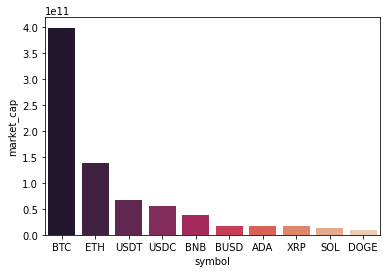

In [9]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

<AxesSubplot:xlabel='symbol', ylabel='circulating_supply'>

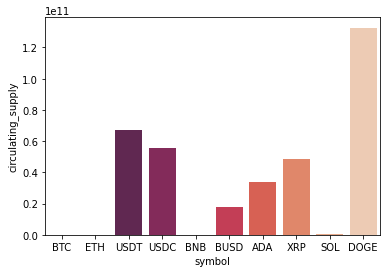

In [10]:
sns.barplot(x="symbol", y="circulating_supply", palette="rocket", data=df)

In [11]:
from datetime import datetime,timedelta

print(datetime.now().strftime('%Y-%m-%d'))
df['date'] = datetime.now().strftime('%Y-%m-%d')
df['date_24h'] = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df['date_30d'] = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
df['date_60d'] = (datetime.now() - timedelta(days=60)).strftime('%Y-%m-%d')

2022-06-23


In [12]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,date,date_24h,date_30d,date_60d
0,BTC,21000000.0,1.907524e+07,1.907524e+07,3.983923e+11,20885.308623,2.514095e+10,4.883554,-0.099047,-28.849226,-47.186888,2022-06-23,2022-06-22,2022-05-24,2022-04-24
1,ETH,NaN,1.212794e+08,1.212794e+08,1.373714e+11,1132.685400,1.387798e+10,7.223193,2.524684,-42.202065,-61.564358,2022-06-23,2022-06-22,2022-05-24,2022-04-24
2,USDT,NaN,6.697973e+10,6.861062e+10,6.692794e+10,0.999227,4.148383e+10,0.023029,0.032655,0.013950,-0.101155,2022-06-23,2022-06-22,2022-05-24,2022-04-24
3,USDC,NaN,5.567321e+10,5.567321e+10,5.567687e+10,1.000066,4.530546e+09,-0.006445,-0.000289,-0.049841,-0.015925,2022-06-23,2022-06-22,2022-05-24,2022-04-24
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.734105e+10,228.697568,1.138204e+09,6.877223,6.368025,-29.197450,-43.032707,2022-06-23,2022-06-22,2022-05-24,2022-04-24


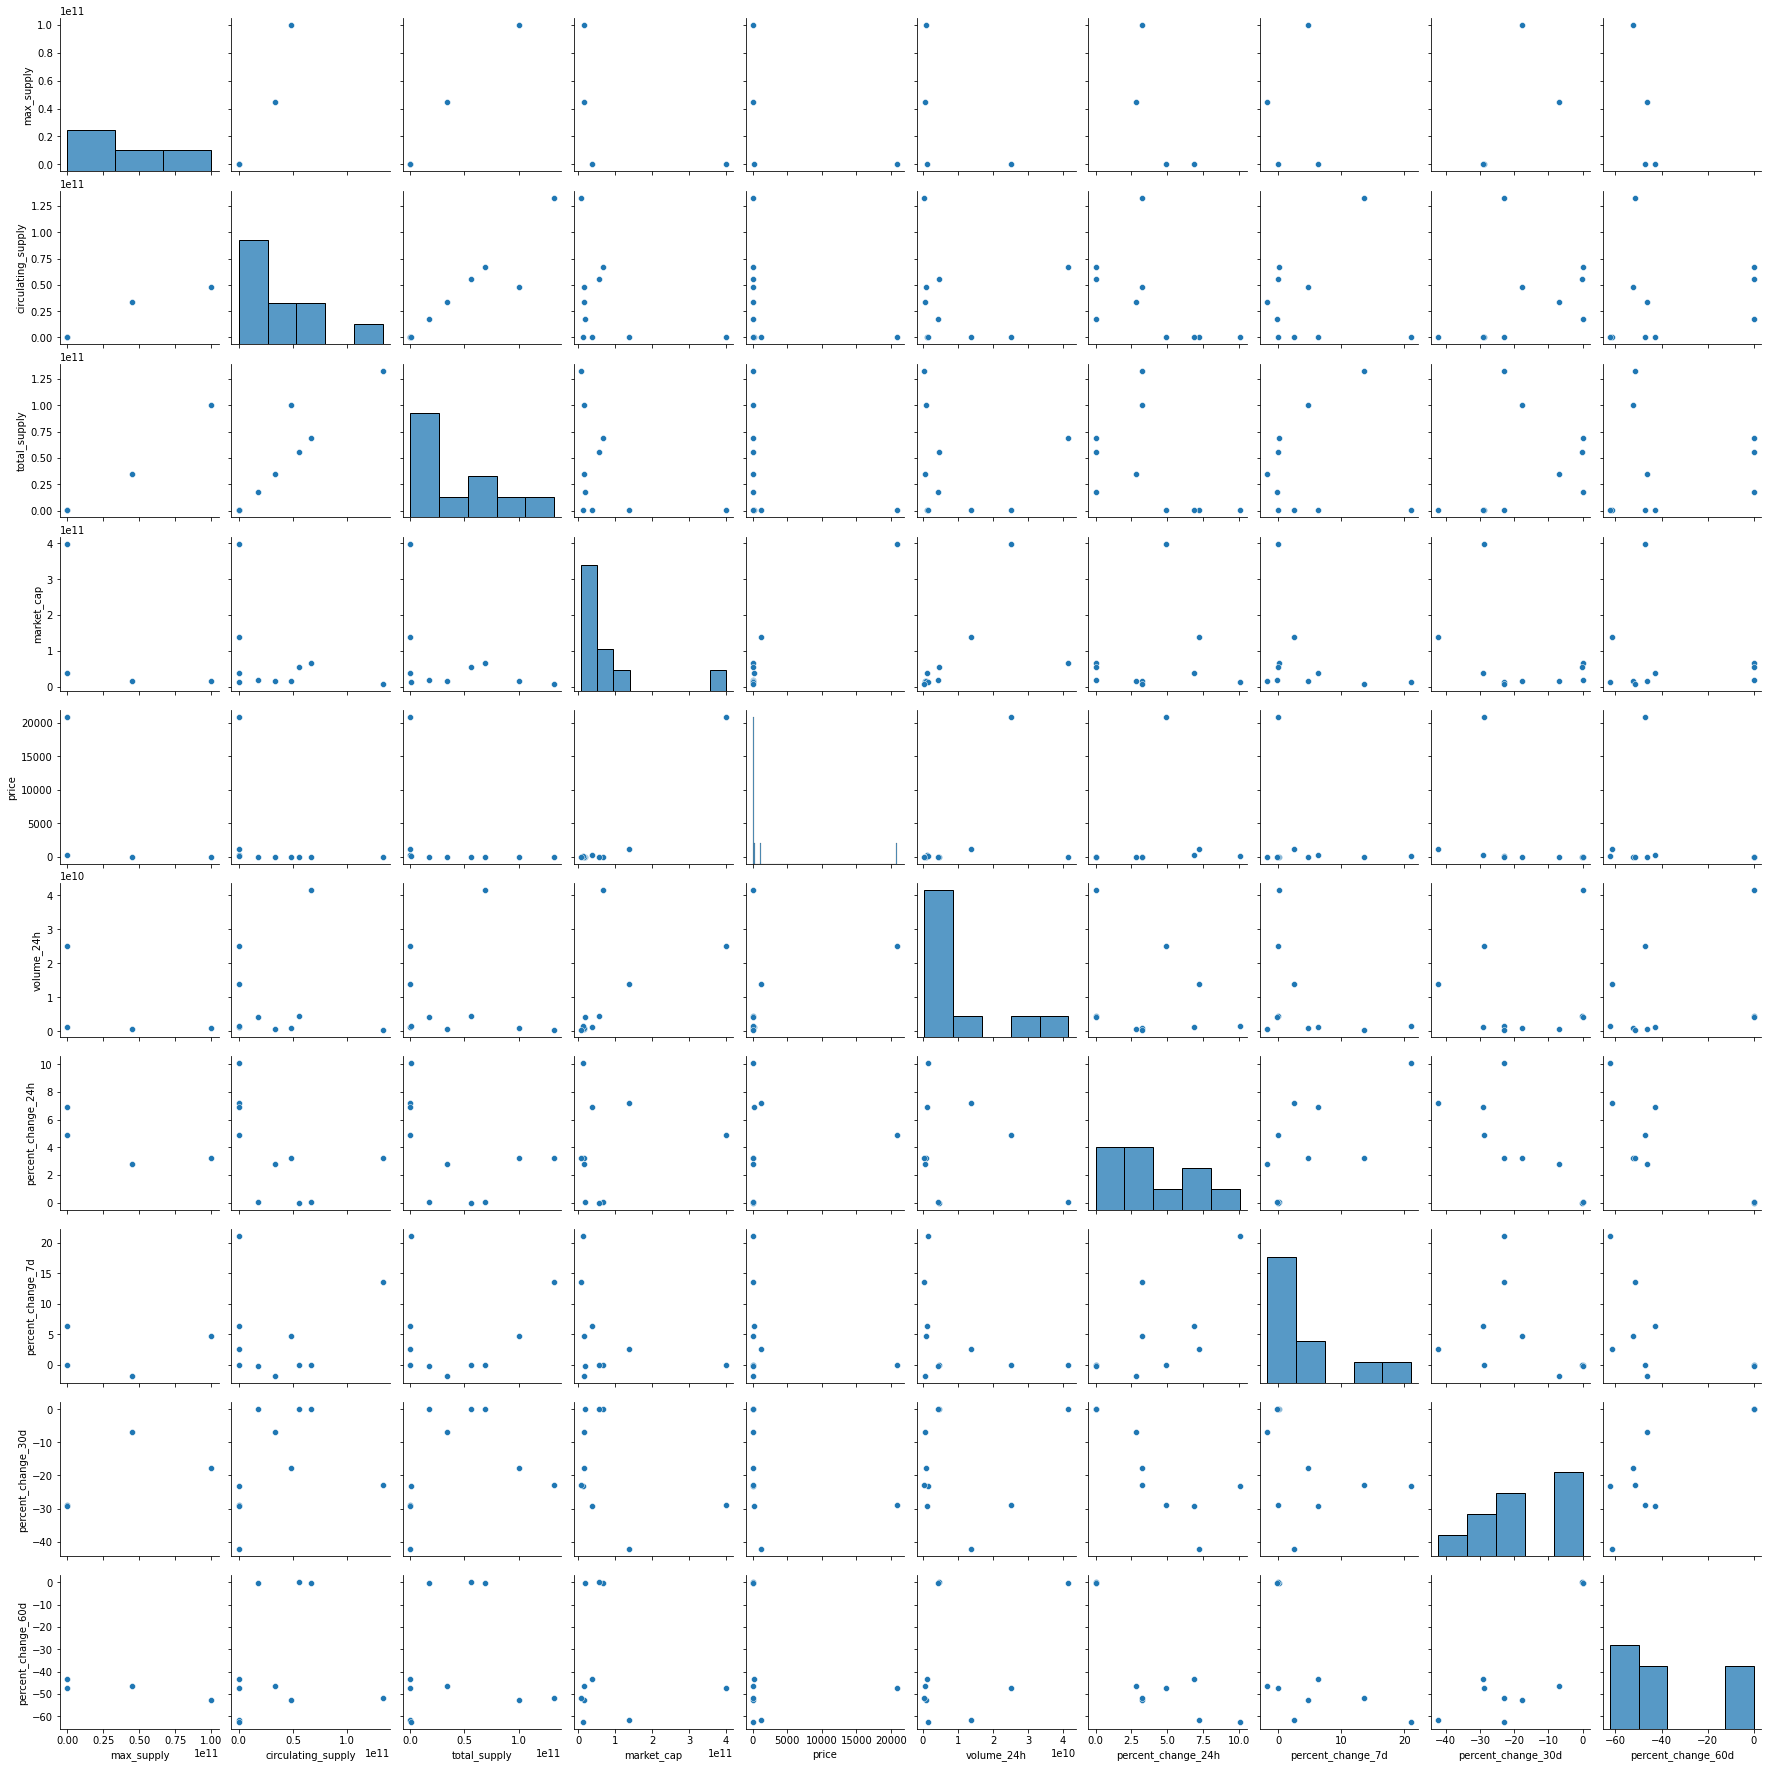

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='symbol', ylabel='price'>

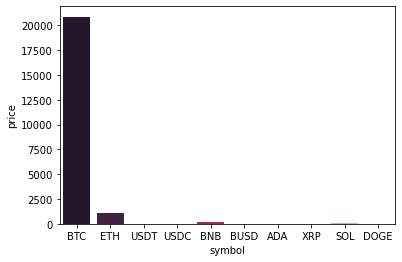

In [14]:
sns.barplot(x="symbol", y="price", palette="rocket", data=df)

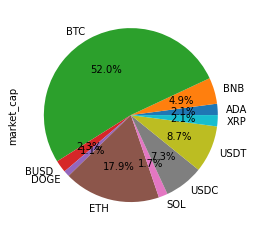

In [15]:
data = df.groupby("symbol")["market_cap"].sum()
data.plot.pie(autopct="%.1f%%");

In [16]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

<AxesSubplot:xlabel='symbol', ylabel='market_cap'>

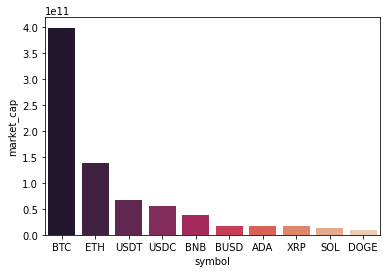

In [17]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

In [19]:
#import plotly.express as px

In [23]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

In [25]:
app = dash.Dash()
fig = px.bar(
    df,
    x="symbol",
    y="market_cap",
    #size="market_cap",
    #color="continent",
    hover_name="symbol",
    #log_x=True,
    #size_max=60,
)

app.layout = html.Div([dcc.Graph(id="life-exp-vs-gdp", figure=fig)])


if __name__ == "__main__":
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

